# Topic Coherence Measures

Topic coherence represents the overall topics’ interpretability and is used to assess the topics’ quality.

![](../figs/intro_nlp/topic_coherence/entelecheia_topic_coherence.png)

## Topic Modeling

Topic modeling aims to explain a collection of documents as a mixture of topics. Each topic is a distribution over words, and each document is a distribution over topics. The goal of topic modeling is to find the topics and their distributions over words and documents.

It is based on the assumption that:

-  A text (document) is composed of several topics.
-  A topic is composed of several words.

## Evaluating Topics

Topic modeling algorithms rely on statistical inference to find the topics. However, the quality of the topics is not directly observable. Therefore, we need to evaluate the topics to assess their quality.

Mathematically optimal topics are not necessarily interpretable. Therefore, we need to evaluate the topics based on their interpretability.

For example, a topic modeling algorithm can find the following topics:

-  Topic 1: `['cat', 'dog', 'toy', 'pet']`
-  Topic 2: `['super', 'brick', 'number']`

The first topic is more interpretable than the second topic to humans. However, the second topic is mathematically as optimal as the first topic.

When we’re looking for data understanding, the topics created are meant to be interpreted by humans. Therefore, we need to evaluate the topics based on their interpretability.

Topic coherence is a measure of interpretability. It is used to evaluate the topics’ quality. It tries to represent the degree of semantic similarity between high scoring words in a topic.

## Topic Coherence

Usually, when we talk about coherence, it refers to the charateristic of cooperative and consistent behavior. For example, a group of people can be coherent if they have the same opinion about something.

What a topic coherence measure assesses is how well a topic is supported by a text corpus. It uses statistics and probabilities drawn from the text corpus to measure the coherence of a topic, especially focusing on the word's context.

Topic coherence depends not only on the words in a topic but also on the reference corpus.

![Topic Coherence](../figs/intro_nlp/topic_coherence/topic_coherence.png)

Röder, M. et al propose a general structure for topic coherence measures. {cite}`roder2015exploring` 
It consists of three components:

It's a composition of different independent components, each one doing a different task, that is combined in a sequential pipeline.

The topic coherence measure is a pipeline that receives the topics and the reference corpus as inputs and outputs a single value representing the overall coherence of the topics.

![](../figs/intro_nlp/topic_coherence/topic_coherence_structure.png)

### Segmentation

The segmentation module is responsible for creating pairs of word subsets that will be used to compute the coherence of a topic.

Considering $W={w_1, w_2, …, w_n}$ as the top-n most important words of a topic $t$, the application of a segmentation $S$ results in a set of subset pairs from $W$.

$$ S = \{(W^{\prime}, W^*), W^{\prime}, W^* \subseteq W\} $$

To simplify things, we can understand the segmentation as the step where we choose how we want to mix the words in a topic to evaluate them posteriorly.

For example, the segmentation S-one-one, says that we need to make word pairs of different words. If $W={w_1, w_2, …, w_n}$, then the segmentation S-one-one will result in the following pairs:

$$ S = \{(w_1, w_2), (w_1, w_3), …, (w_1, w_n), (w_2, w_3), …, (w_2, w_n), …, (w_{n-1}, w_n)\} $$

So, by using this technique, we’re saying that to compute the final coherence score, our model is interested in the relationship between each word in the topic and the other words in the topic.

Another example is the segmentation S-one-all, which says that we need to make pairs of each word with all other words. Applying it to $W$ will result in the following pairs:

$$ S = \{(\{w_1\}, \{w_2, w_3, …, w_n\}), (\{w_2\}, \{w_1, w_3, …, w_n\}), …, (\{w_n\}, \{w_1, w_2, …, w_{n-1}\})\} $$

So, by using this technique, we’re saying that to compute the final coherence score, our model is interested in the relationship between each word in the topic and all the other words in the topic.

### Probability Calculation

Coherence metrics use probabilities drawn from the textual corpus. The probability calculation module is responsible for calculating the probabilities of the word subsets generated by the segmentation module.

For example, let's say we’re interested in two different probabilities:

-  $P(w)$: the probability of a word $w$ in the corpus.
-  $P(w_1, w_2)$: the probability of a word pair $(w_1, w_2)$ in the corpus.

Different techniques will estimate these probabilities in different ways. For example, the probability $P_{bd}(w)$ can be estimated by counting the number of documents that $w$ appears and dividing it by the total number of documents in the corpus.

$$ P_{bd}(w) = \frac{count(D_{w})}{N} $$

The probability $P(w_1, w_2)$ can be estimated by counting the number of documents that both $w_1$ and $w_2$ appear and dividing it by the total number of documents in the corpus.

$$ P(w_1, w_2) = \frac{count(D_{w_1, w_2})}{N} $$

Another example is to use sentence-level probabilities. In this case, the probability $P_{bs}(w)$ is estimated by counting the number of sentences that $w$ appears and dividing it by the total number of sentences in the corpus.

In case of $P_{sw}$, the probability is estimated by counting the number of sliding windows that $w$ appears and dividing it by the total number of sliding windows in the corpus.

These probabilities are the fundamental building blocks of the coherence metrics.

### Confirmation Measure

The confirmation measure module is the core of the coherence metrics. It is responsible for calculating the confirmation of a word subset.

The confirmation measure is calculated by comparing the probability of the word subset $S$ with the probabilities of the words in the subset. It computes how well the subset $W^*$ supports the words in the subset $W^{\prime}$.

That is, it tries to measure how well two subsets of words are related to each other by comparing the probabilities calculated from the corpus.

If the words in $W^{\prime}$ are more likely to appear together with the words in $W^*$, then the confirmation measure will be high. Otherwise, it will be low.

For example, let's say we have the following word subsets:

-  $W^{\prime} = \{w_1, w_2\}$
-  $W^* = \{w_3, w_4\}$

The confirmation measure will be high if the words $w_1$ and $w_2$ are more likely to appear together with the words $w_3$ and $w_4$ in the reference corpus.


![](../figs/intro_nlp/topic_coherence/confirmation_measure.png)


The confirmation measure is applied to each one of the pairs created in the segmentation step, yielding a confirmation score for each pair.

There are two different types of confirmation measures: direct and indirect.

#### Direct Confirmation Measure

The direct confirmation measure is the simplest one. It compares the probabilities of the word subsets $W^{\prime}$ and $W^*$.

$$ m_r(S_i) = \frac{P(W^{\prime}, W^*)}{P(W^{\prime})P(W^*)} $$

or, using logarithms:

$$ m_{lr}(S_i) = log \frac{P(W^{\prime}, W^*) + \epsilon}{P(W^{\prime})P(W^*) + \epsilon} $$

where $\epsilon$ is a small constant to avoid undefined values for logarithms.

#### Indirect Confirmation Measure

The indirect confirmation measure is a more complex one. It computes a direct confirmation measure for each word in the subsets $W^{\prime}$ with all other words in the subset $W$, yielding a vector of confirmation scores for each word in $W^{\prime}$.

$$ \vec{v}_m(W^{\prime}) = \left\{\sum_{w \in W^{\prime}} m(w_i, w_j)\right\}_{j=1,2, …, |W|} $$

where $|W|$ is the number of words in $W$.

The same is done for the subset $W^*$.

Then, the indirect confirmation measure is the similarity between the two vectors.

$$ \tilde{m}_{cos}(W^{\prime}, W^*) = sim(\vec{v}_m(W^{\prime}), \vec{v}_m(W^*)) $$

where $sim$ is a similarity function, such as cosine similarity.

![](../figs/intro_nlp/topic_coherence/indirect_confirmation_measure.png)

The idea behind this indirect confirmation measure is that it tries to capture some relationships that are not captured by the direct confirmation measure. 

For example, the words ‘cats’ and ‘dogs’ may never appear together in our dataset, but they might appear frequently with the words ‘toys’, ‘pets’, and ‘cute’. In this case, the direct confirmation measure will not be able to capture the relationship between ‘cats’ and ‘dogs’ because they never appear together. However, the indirect confirmation measure will be able to capture this relationship because it will be able to see that ‘cats’ and ‘dogs’ appear frequently with the words ‘toys’, ‘pets’, and ‘cute’.

### Aggregation

The aggregation module is responsible for aggregating the confirmation scores of the pairs generated in the previous step. It computes the final coherence score for the topic. 

There are different types of aggregation techniques: mean, median, geometric mean, and so on.

![](../figs/intro_nlp/topic_coherence/aggregation.png)

### Putting everything together

Measuring the coherence metrics follows the following steps:

- We have a topic $T$ that we want to measure the coherence of.
- We choose a reference corpus $C$.
- The top-n most important words in the topic $T$ are extracted, yielding a word subset $W$.
- $W$ is segmented into pairs of words, yielding a set of word subsets $S$.
- Using the reference corpus $C$, we calculate the probabilities of the word subsets $S$.
- With the segmented word subsets $S$ and the probabilities calculated from the reference corpus $C$, we calculate the confirmation measure for each pair of words in $S$.
- All the confirmation scores are aggregated into a single coherence score for the topic $T$.

![](../figs/intro_nlp/topic_coherence/putting_everything_together.png)



If we have more than one topic, we can repeat the same process for each topic and use the average coherence score as a measure of the quality of the topic model.

![](../figs/intro_nlp/topic_coherence/multiple_topics.png)

The Gensim library provides a class that implements the four most famous coherence models: 
$u_{mass}$, $c_v$, $c_{uci}$, $c_{npmi}$.

![](../figs/intro_nlp/topic_coherence/gensim_coherence_models.png)

$C_{NPMI}$ uses the following steps:

- Segmentation: S-one-one (one word in each subset)
- Probability estimation: the probabilities are calculated over a sliding window of size 10.
- Confirmation measure: the confirmation measure is the Normalized Pointwise Mutual Information (NPMI).

$$ NPMI(W^{\prime}, W^*) = \frac{log \frac{P(W^{\prime}, W^*) + \epsilon}{P(W^{\prime})P(W^*) + \epsilon}}{-log (P(W^{\prime}, W^*) + \epsilon)} $$

where $\epsilon$ is a small constant to avoid undefined values for logarithms.
- Aggregation: the aggregation is the mean of the confirmation scores.

$C_V$ uses the following steps:

- Segmentation: S-one-set, the confirmaion measure is calculated for pairs of words that are in the same subset.
- Probability estimation: the probabilities are calculated over a sliding window of size 110.
- Confirmation measure: indirect confirmation measure, the similarity function is cosine similarity.
- Aggregation: the aggregation is the mean of the confirmation scores.

## Understanding Pointwise Mutual Information

How to understand whether two (or more) words are related or form a concept?

- If some words appear together more often than we would expect by chance, then we can say that they are related. 
- However, we need to be careful because some words may appear together more often than we would expect by chance just because they are very frequent words. 
- For example, in the case of `New York`, the word `New` appears very frequently in the news, so it is likely to appear together with other words more often than we would expect by chance. 
- How can we assess whether the cooccurrence of `New` and `York` is due to chance or due to a relationship between the two words?

The pointwise mutual information (PMI) is a measure that can be used to assess whether two words are related or not. PMI quantifies the likelihood that two words appear together in a text, given that they appear separately in the text.

### PMI

The PMI is a measure of the association between two words. It is defined as follows:

$$ PMI(w_i, w_j) = log \frac{P(w_i, w_j)}{P(w_i)P(w_j)} $$

where $P(w_i, w_j)$ is the probability of the words $w_i$ and $w_j$ appearing together in the corpus, and $P(w_i)$ and $P(w_j)$ are the probabilities of the words $w_i$ and $w_j$ appearing individually in the corpus.

When $w_i$ and $w_j$ are independent, $P(w_i, w_j) = P(w_i)P(w_j)$, and the PMI is zero. 

When $w_i$ and $w_j$ are dependent, $P(w_i, w_j) > P(w_i)P(w_j)$, and the PMI is positive. 

When $w_i$ and $w_j$ are negatively dependent, $P(w_i, w_j) < P(w_i)P(w_j)$, and the PMI is negative.

### Normalized Pointwise Mutual Information

The PMI is a good measure of the association between two words, but it has some limitations. 

For example, the PMI is not normalized, so it is difficult to compare the association between two words with different frequencies.

The normalized pointwise mutual information (NPMI) is a normalized version of the PMI. It is defined as follows:

$$ NPMI(w_i, w_j) = \frac{PMI(w_i, w_j)}{-log(P(w_i, w_j))} $$


## Understanding Cosine Similarity

The cosine similarity is a measure of similarity between two vectors. It is defined as follows:

$$ cos(\theta) = \frac{A \cdot B}{||A|| \cdot ||B||} $$

where $A$ and $B$ are two vectors, and $\theta$ is the angle between the two vectors.

The cosine similarity is a number between -1 and 1.

- When the two vectors are identical, the cosine similarity is 1.
- When the two vectors are orthogonal, the cosine similarity is 0.
- When the two vectors are antipodal, the cosine similarity is -1.
- When the two vectors are similar, the cosine similarity is positive.
- When the two vectors are dissimilar, the cosine similarity is negative.

## Topic Coherence in Practice

Let's evaluate some topics using the dataset `20newsgroups` as a reference corpus.

In [18]:
%config InlineBackend.figure_format='retina'

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [19]:
texts, _ = fetch_20newsgroups(
    subset="all", remove=("headers", "footers", "quotes"), return_X_y=True
)
tokenizer = lambda s: re.findall("\w+", s.lower())
texts = [tokenizer(t) for t in texts]
stopwords = set(stopwords.words("english"))
texts = [[w for w in t if w not in stopwords and len(w) > 1] for t in texts]


In [20]:
finder = BigramCollocationFinder.from_words(sum(texts[:100], []))
bgm = BigramAssocMeasures()
score = bgm.mi_like
collocations = {"_".join(bigram): pmi for bigram, pmi in finder.score_ngrams(score)}


In [21]:
# Top 10 collocations
collocations = pd.DataFrame(
    sorted(collocations.items(), key=lambda x: x[1], reverse=True),
    columns=["bigram", "score"],
)
collocations.head(10)

,bigram,score
0,united_states,7.111111
1,et_al,5.142857
2,greatly_appreciated,3.000000
3,hymenaeus_beta,3.000000
4,proving_existence,3.000000
5,3d_studio,2.666667
6,mozumder_proving,2.250000
7,_equinox_iii,2.000000
8,alex_delvecchio,2.000000
9,annals_cirp,2.000000


In [22]:
# Creating some random topics
topics = [
    ["space", "planet", "mars", "galaxy"],
    ["cold", "medicine", "doctor", "health", "water"],
    ["cats", "health", "keyboard", "car", "banana"],
    ["windows", "mac", "computer", "operating", "system"],
]

# Creating a dictionary with the vocabulary
word2id = Dictionary(texts)

# Coherence model
cm = CoherenceModel(topics=topics, texts=texts, coherence="c_v", dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()


In [23]:
topics_str = ["\n ".join(t) for t in topics]
data_topic_score = pd.DataFrame(
    data=zip(topics_str, coherence_per_topic), columns=["Topic", "Coherence"]
)
data_topic_score = data_topic_score.set_index("Topic")

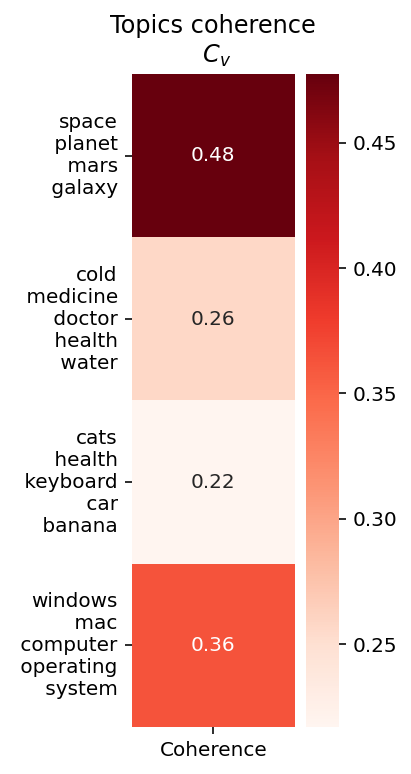

In [24]:
fig, ax = plt.subplots(figsize=(2, 6))
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(
    data=data_topic_score,
    annot=True,
    square=True,
    cmap="Reds",
    fmt=".2f",
    linecolor="black",
    ax=ax,
)
plt.yticks(rotation=0)
ax.set_xlabel("")
ax.set_ylabel("")
fig.show()
